In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import cv2 # Image reading and preprocessing
import keras # To Build our model
from keras.layers import Conv2D , MaxPooling2D # Getting our Layers for ConvNet
from keras.optimizers import SGD # Our Optimizer, but we will be using adam.
from keras.models import Sequential # We will be using Sequential as our model
from keras.layers import Dropout, Dense , Flatten # Our other layers
# 1 : Dropout :   will switch off some neurons in our model simoultaneously
# 2 : Dense   :   will create a Normal layer of neurons
# 3 : Fatten  :   to Flatten our output from Conv layers 
from keras.utils import to_categorical # to make data categorized like converting data into arrays
from sklearn.model_selection import train_test_split # Splitting the data into training and testing
from matplotlib.image import imread #To read the image
import os

Using TensorFlow backend.


In [3]:
categories = []
# Setting variable filenames to path to iterate better 
filenames = os.listdir("images/")
for filename in filenames:
        # Splitting the file.png to get the category 
        # Suppose /kaggle/input/butterfly-dataset/leedsbutterfly/images/001000.png
        category = filename.split(".")[0]
        # This will return 001000
        categories.append(category[0:3])
        # This will append the categories with 001
        
print(categories[0:5])

['001', '001', '001', '001', '001']


In [4]:
df = pd.DataFrame({
    "Image" : filenames,
    "Category" : categories
})
df.head()

,Image,Category
0,0010001.png,001
1,0010002.png,001
2,0010004.png,001
3,0010005.png,001
4,0010006.png,001


In [7]:
print(df.shape)
df['Category'].value_counts()

(832, 2)


006    100
002     93
009     90
004     90
007     89
005     88
010     84
001     82
003     61
008     55
Name: Category, dtype: int64

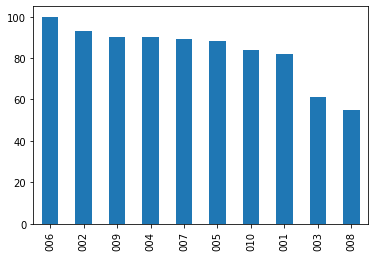

In [8]:
df['Category'].value_counts().plot.bar()

In [9]:
df['Image'].head()

0    0010001.png
1    0010002.png
2    0010004.png
3    0010005.png
4    0010006.png
Name: Image, dtype: object

Reading the Images from the Folder and converting them to numpy arrays for better computation

In [10]:
X = []
folder_path = os.listdir("images/")
for file in folder_path:
    
    # Reading the Image
    img = cv2.imread("images/"+file,cv2.IMREAD_COLOR)
    # Resizing the current Image to a dimension of (128,128,3)
    img = cv2.resize(img,(128,128))
    
    # Converting them to Numpy arrays and appending to our List X
    X.append(np.array(img))
    
# Confirming if Images are converted to our desired dimensions 
print(X[1].shape)

(128, 128, 3)


In [16]:
df.head()

,Image,Category
0,0010001.png,Danaus_plexippus
1,0010002.png,Danaus_plexippus
2,0010004.png,Danaus_plexippus
3,0010005.png,Danaus_plexippus
4,0010006.png,Danaus_plexippus


In [15]:
df["Category"] = df["Category"].replace({'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '010': 'Vanessa_cardui'})

In [18]:
y = df['Category'].values
print(y[0:5])

['Danaus_plexippus' 'Danaus_plexippus' 'Danaus_plexippus'
 'Danaus_plexippus' 'Danaus_plexippus']


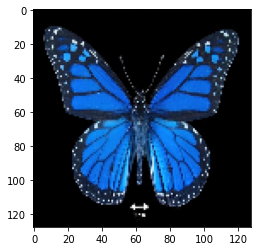

In [19]:
plt.imshow(X[1])

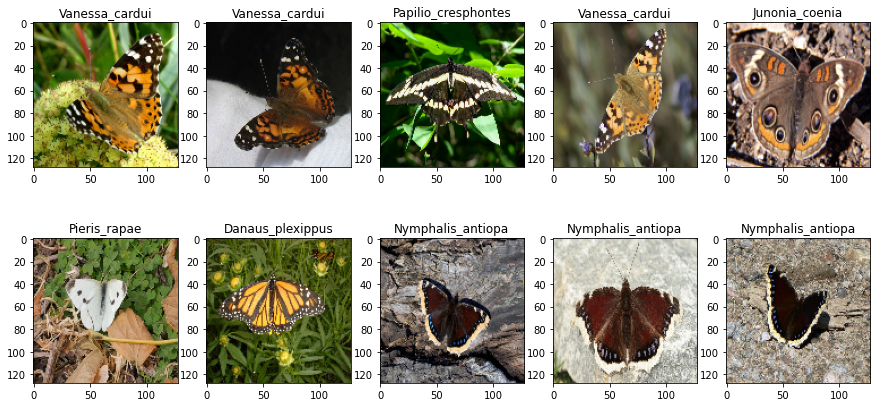

In [20]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [22]:
#Using LabelEncoder to convert our labels into numeric values
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Category'] = enc.fit_transform(df['Category'])
print(df.head())

         Image  Category
0  0010001.png         0
1  0010002.png         0
2  0010004.png         0
3  0010005.png         0
4  0010006.png         0


In [74]:
print(X[0:5])

[[[[115 142 121]
   [122 184 140]
   [126 180 141]
   ...
   [136 142 144]
   [157 155 153]
   [149 151 148]]

  [[ 86 160 116]
   [117 179 141]
   [106 167 119]
   ...
   [145 160 159]
   [151 162 162]
   [156 159 160]]

  [[109 165 119]
   [ 99 167 115]
   [ 91 183 126]
   ...
   [168 183 186]
   [168 183 182]
   [173 181 181]]

  ...

  [[ 13  96  47]
   [  4 115  57]
   [ 57 139  87]
   ...
   [135 153 150]
   [162 163 164]
   [174 174 176]]

  [[ 13 112  60]
   [ 61 136  84]
   [ 67 131  94]
   ...
   [129 140 143]
   [147 151 152]
   [166 170 171]]

  [[ 52 131  82]
   [ 78 146 101]
   [ 75 137 111]
   ...
   [145 147 155]
   [153 156 161]
   [158 163 168]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

In [24]:
Y = df['Category'].values
print(Y[0:5])
print(Y.ndim)

[0 0 0 0 0]
1


Using OneHotEncoder to encode our data so that we can use it in our model Suppose we have the specie as 1 i.e 'Danaus_plexippus' OneHotEncoder will encode it as [1,0,0,0,0,0,0,0,0,0] For 2 i.e 'Heliconius_charitonius it will be [0,1,0,0,0,0,0,0,0,0]

In [27]:
Y = Y.reshape(len(Y),1)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y)
print(type(Y))

<class 'scipy.sparse.csr.csr_matrix'>


In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [82]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model


baseModel = VGG16(weights="imagenet", include_top=False,
input_shape=((128, 128, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

In [83]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [103]:
model.layers

In [89]:
from tensorflow.keras.optimizers import Adam

INIT_LR = 1e-3
EPOCHS = 25
BS = 8
opt = Adam(lr=INIT_LR)

model.compile(loss = 'categorical_crossentropy', optimizer = opt,
    metrics=["accuracy"])
# H = model.fit(trainX, trainY.toarray(), batch_size=BS, epochs = 30)
H = model.fit_generator(
    trainAug.flow(X_train, Y_train.toarray(), batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(x_test, y_test.toarray()),
    validation_steps=len(x_test) // BS,
    epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
72/72 [==============================] - 53s 731ms/step - loss: 6.8541 - accuracy: 0.2317 - val_loss: 1.9745 - val_accuracy: 0.4440
Epoch 2/25
72/72 [==============================] - 25s 343ms/step - loss: 1.9573 - accuracy: 0.3955
Epoch 3/25
72/72 [==============================] - 25s 348ms/step - loss: 1.6318 - accuracy: 0.4861
Epoch 4/25
72/72 [==============================] - 26s 361ms/step - loss: 1.3473 - accuracy: 0.5331
Epoch 5/25
72/72 [==============================] - 24s 337ms/step - loss: 1.1683 - accuracy: 0.6272
Epoch 6/25
72/72 [==============================] - 25s 342ms/step - loss: 0.9827 - accuracy: 0.6551
Epoch 7/25
72/72 [==============================] - 25s 344ms/step - loss: 0.9110 - accuracy: 0.6986
Epoch 8/25
72/72 [==============================] - 25s 348ms/step - loss: 0.8340 - accuracy: 0.7091
Epoch 9/25
72/72 [==============================] - 25s 352ms/step - loss:

In [91]:
predIdxs = model.predict(x_test)

In [92]:
predIdxs = np.argmax(predIdxs, axis=1)
predIdxs

array([9, 7, 4, 5, 9, 3, 1, 9, 6, 9, 8, 8, 6, 0, 2, 8, 8, 0, 3, 3, 6, 1,
       4, 6, 6, 4, 7, 3, 6, 9, 8, 5, 6, 3, 3, 3, 0, 0, 5, 5, 2, 0, 3, 2,
       2, 0, 1, 6, 5, 5, 5, 0, 7, 2, 2, 4, 8, 5, 2, 4, 0, 4, 4, 5, 0, 0,
       0, 7, 5, 4, 8, 0, 4, 4, 9, 2, 1, 2, 4, 7, 5, 0, 1, 6, 6, 0, 2, 9,
       7, 5, 3, 0, 1, 5, 3, 1, 6, 3, 6, 9, 1, 9, 9, 4, 6, 9, 8, 3, 3, 4,
       3, 3, 7, 8, 5, 0, 8, 6, 3, 2, 9, 4, 3, 0, 8, 5, 5, 3, 0, 4, 1, 3,
       9, 0, 3, 4, 9, 3, 2, 6, 9, 4, 0, 1, 8, 2, 0, 4, 9, 6, 8, 4, 3, 5,
       9, 5, 3, 5, 0, 4, 4, 2, 9, 2, 7, 6, 0, 1, 9, 6, 1, 5, 2, 0, 4, 8,
       3, 9, 1, 5, 6, 9, 1, 3, 1, 8, 1, 3, 8, 5, 5, 9, 2, 1, 5, 8, 0, 4,
       8, 6, 0, 9, 4, 8, 5, 1, 7, 3, 9, 3, 1, 0, 3, 4, 9, 5, 1, 5, 9, 5,
       8, 0, 1, 3, 9, 5, 6, 4, 7, 9, 0, 7, 0, 0, 0, 3, 8, 6, 3, 4, 4, 6,
       3, 1, 0, 9, 0, 1, 9, 5], dtype=int64)

In [109]:
x_test.shape

(250, 128, 128, 3)

In [107]:
y_test.shape

(250, 10)

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(classification_report(y_test.toarray().argmax(axis=1), predIdxs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.92      0.96        25
           2       0.88      0.88      0.88        17
           3       1.00      0.94      0.97        35
           4       0.93      0.87      0.90        30
           5       0.87      0.96      0.91        27
           6       0.96      1.00      0.98        22
           7       1.00      0.92      0.96        12
           8       0.86      0.95      0.90        19
           9       0.90      0.93      0.92        29

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

